In [1]:
# Importing the modules:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

In [67]:
# Defining the functions:
def read_file(filename, skiplines):
    """
    filename = name of the file
    skiplines = no. of lines to skip from the top of file
    """
    # Read the file:
    with open(filename) as file:
        lines = file.readlines()  # read file line by line
        total_lines = len(lines)  # Total number of lines
    
    # Read selected data:
    rlines = lines[skiplines:]   # selecting lines from skiplines to end
    data = np.array([list(map(float, line.strip().split())) for line in rlines])
    header = lines[skiplines-1].strip().split()
    dt = data[1][0] - data[0][0]   # time interval between data
    
    return header, dt, data

    
def stress_pbc(sigma, ave_time, skip_col=1):
    """sigma = sigmaXX, sigmaYY, sigmaZZ, ...
    skip_col = 1, to skip the timestep column
    ave_time = Time frames to average in ps"""
    
    s = np.mean(sigma[-ave_time:, :], axis = 0)[skip_col:]
    return np.hstack((s[1:-1], (s[0]+s[-1])/2))



### Au 100 structure | NPT | ro_unchanged_bulkPR

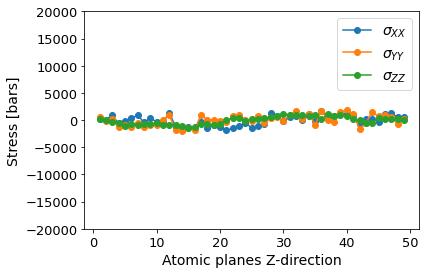

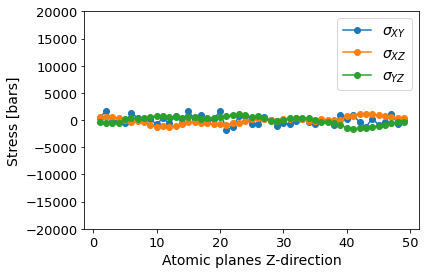

In [4]:
# Reading all the stress datas:
jid = 896342

for i in ['XX', 'YY', 'ZZ', 'XY', 'XZ', 'YZ']:
    _, _, globals()[f'sigma{i}'] = read_file(f'./Simulations/jobfile_{jid}/Stress_{i}.dat', 2)
    
plt.rcParams.update({'xtick.labelsize': 13,
                     'ytick.labelsize':13,
                     'font.size': 14,
                     'font.serif':'Arial'
                    })
# Average and plot the data:
skip_col = 1                              # Number of columns to skip, here 0 = timestep
ave_time = 10                             # Each row is 1 ps, so how often we want to average
N_plane = np.arange(sigmaXX.shape[1] - 1) # no. of planes array


# plotting the stress components XX, YY, ZZ:
plt.plot(N_plane[1:-1], np.mean(sigmaXX[-ave_time:, :], axis = 0)[skip_col+1:-1], '-o', label=r'$\sigma_{XX}$')
plt.plot(N_plane[1:-1], np.mean(sigmaYY[-ave_time:, :], axis = 0)[skip_col+1:-1], '-o', label=r'$\sigma_{YY}$')
plt.plot(N_plane[1:-1], np.mean(sigmaZZ[-ave_time:, :], axis = 0)[skip_col+1:-1], '-o', label=r'$\sigma_{ZZ}$')
plt.xlabel('Atomic planes Z-direction')
plt.ylabel('Stress [bars]')
plt.ylim(-2e4, 2e4)
plt.legend()
plt.savefig(f'./Simulations/jobfile_{jid}/Principal_stress_avg_t{ave_time}.png', dpi = 300, bbox_inches='tight', facecolor="w")
plt.show()

# plotting the stress components XY, XZ, YZ:
plt.plot(N_plane[1:-1], np.mean(sigmaXY[-ave_time:, :], axis = 0)[skip_col+1:-1], '-o', label=r'$\sigma_{XY}$')
plt.plot(N_plane[1:-1], np.mean(sigmaXZ[-ave_time:, :], axis = 0)[skip_col+1:-1], '-o', label=r'$\sigma_{XZ}$')
plt.plot(N_plane[1:-1], np.mean(sigmaYZ[-ave_time:, :], axis = 0)[skip_col+1:-1], '-o', label=r'$\sigma_{YZ}$')
plt.xlabel('Atomic planes Z-direction')
plt.ylabel('Stress [bars]')
plt.ylim(-2e4, 2e4)
plt.legend()
plt.savefig(f'./Simulations/jobfile_{jid}/Diagonal_stress_avg_t{ave_time}.png', dpi = 300, bbox_inches='tight', facecolor="w")
plt.show()

# Plotting the single stress using for loop:#
#-------------------------------------------#
# for i in ['XX', 'YY', 'ZZ', 'XY', 'XZ', 'YZ']:
#     # plotting the stress components:
#     N_plane = np.arange(globals()[f'sigma{i}'].shape[1] - 1) # no. of planes array
#     plt.plot(N_plane[1:-1], np.mean(globals()[f'sigma{i}'][-ave_time:, :], axis = 0)[skip_col+1:-1], '-or')
#     plt.xlabel('Atomic planes Z-direction')
#     plt.ylabel(f'sigma{i}')
#     plt.ylim(-2e4, 2e4)
#     plt.show()

### Au 100 structure | NPT | ro_2%increasePR

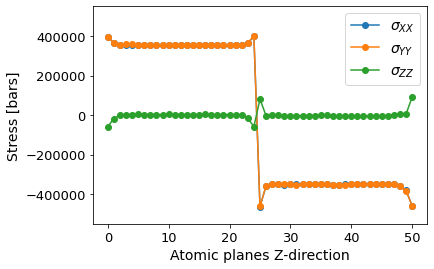

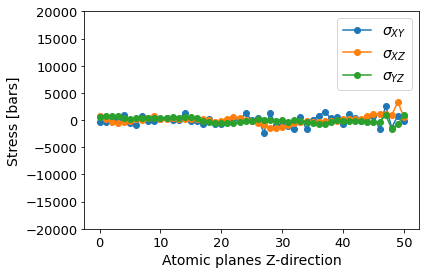

In [5]:
# Reading all the stress datas:
jid = 900829

for i in ['XX', 'YY', 'ZZ', 'XY', 'XZ', 'YZ']:
    _, _, globals()[f'sigma{i}'] = read_file(f'./Simulations/jobfile_{jid}/Stress_{i}.dat', 2)
    
plt.rcParams.update({'xtick.labelsize': 13,
                     'ytick.labelsize':13,
                     'font.size': 14,
                     'font.serif':'Arial'
                    })
# Average and plot the data:
skip_col = 1                              # Number of columns to skip, here 0 = timestep
ave_time = 10                             # Each row is 1 ps, so how often we want to average
N_plane = np.arange(sigmaXX.shape[1] - 1) # no. of planes array


# plotting the stress components XX, YY, ZZ:
plt.plot(N_plane, np.mean(sigmaXX[-ave_time:, :], axis = 0)[skip_col:], '-o', label=r'$\sigma_{XX}$')
plt.plot(N_plane, np.mean(sigmaYY[-ave_time:, :], axis = 0)[skip_col:], '-o', label=r'$\sigma_{YY}$')
plt.plot(N_plane, np.mean(sigmaZZ[-ave_time:, :], axis = 0)[skip_col:], '-o', label=r'$\sigma_{ZZ}$')
plt.xlabel('Atomic planes Z-direction')
plt.ylabel('Stress [bars]')
plt.ylim(-5.5e5, 5.5e5)
plt.legend()
plt.savefig(f'./Simulations/jobfile_{jid}/Principal_stress_avg_t{ave_time}.png', dpi = 300, bbox_inches='tight', facecolor="w")
plt.show()

# plotting the stress components XY, XZ, YZ:
plt.plot(N_plane, np.mean(sigmaXY[-ave_time:, :], axis = 0)[skip_col:], '-o', label=r'$\sigma_{XY}$')
plt.plot(N_plane, np.mean(sigmaXZ[-ave_time:, :], axis = 0)[skip_col:], '-o', label=r'$\sigma_{XZ}$')
plt.plot(N_plane, np.mean(sigmaYZ[-ave_time:, :], axis = 0)[skip_col:], '-o', label=r'$\sigma_{YZ}$')
plt.xlabel('Atomic planes Z-direction')
plt.ylabel('Stress [bars]')
plt.ylim(-2e4, 2e4)
plt.legend()
plt.savefig(f'./Simulations/jobfile_{jid}/Diagonal_stress_avg_t{ave_time}.png', dpi = 300, bbox_inches='tight', facecolor="w")
plt.show()

# Plotting the single stress using for loop:#
#-------------------------------------------#
# for i in ['XX', 'YY', 'ZZ', 'XY', 'XZ', 'YZ']:
#     # plotting the stress components:
#     N_plane = np.arange(globals()[f'sigma{i}'].shape[1] - 1) # no. of planes array
#     plt.plot(N_plane[1:-1], np.mean(globals()[f'sigma{i}'][-ave_time:, :], axis = 0)[skip_col+1:-1], '-or')
#     plt.xlabel('Atomic planes Z-direction')
#     plt.ylabel(f'sigma{i}')
#     plt.ylim(-2e4, 2e4)
#     plt.show()

### Au 100 structure | NPT | ro_5%increasePR

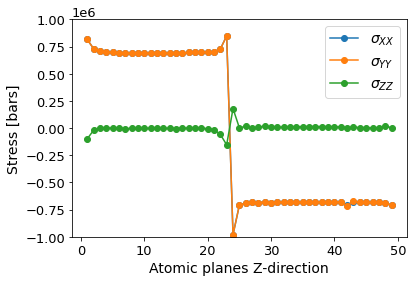

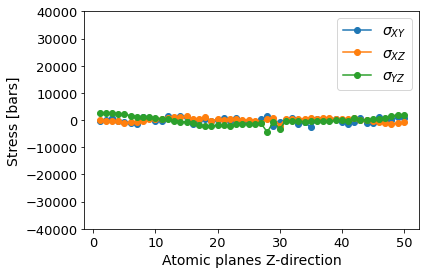

In [7]:
# Reading all the stress datas:
jid = 900846

for i in ['XX', 'YY', 'ZZ', 'XY', 'XZ', 'YZ']:
    _, _, globals()[f'sigma{i}'] = read_file(f'./Simulations/jobfile_{jid}/Stress_{i}.dat', 2)
    
plt.rcParams.update({'xtick.labelsize': 13,
                     'ytick.labelsize':13,
                     'font.size': 14,
                     'font.serif':'Arial'
                    })
# Average and plot the data:
skip_col = 1                              # Number of columns to skip, here 0 = timestep
ave_time = 10                             # Each row is 1 ps, so how often we want to average
N_plane = np.arange(sigmaXX.shape[1] - 1) # no. of planes array


# plotting the stress components XX, YY, ZZ:
plt.plot(N_plane[1:-1], np.mean(sigmaXX[-ave_time:, :], axis = 0)[skip_col+1:-1], '-o', label=r'$\sigma_{XX}$')
plt.plot(N_plane[1:-1], np.mean(sigmaYY[-ave_time:, :], axis = 0)[skip_col+1:-1], '-o', label=r'$\sigma_{YY}$')
plt.plot(N_plane[1:-1], np.mean(sigmaZZ[-ave_time:, :], axis = 0)[skip_col+1:-1], '-o', label=r'$\sigma_{ZZ}$')
plt.xlabel('Atomic planes Z-direction')
plt.ylabel('Stress [bars]')
plt.ylim(-1e6, 1e6)
plt.legend()
plt.savefig(f'./Simulations/jobfile_{jid}/Principal_stress_avg_t{ave_time}.png', dpi = 300, bbox_inches='tight', facecolor="w")
plt.show()

# plotting the stress components XY, XZ, YZ:
plt.plot(N_plane[1:], np.mean(sigmaXY[-ave_time:, :], axis = 0)[skip_col+1:], '-o', label=r'$\sigma_{XY}$')
plt.plot(N_plane[1:], np.mean(sigmaXZ[-ave_time:, :], axis = 0)[skip_col+1:], '-o', label=r'$\sigma_{XZ}$')
plt.plot(N_plane[1:], np.mean(sigmaYZ[-ave_time:, :], axis = 0)[skip_col+1:], '-o', label=r'$\sigma_{YZ}$')
plt.xlabel('Atomic planes Z-direction')
plt.ylabel('Stress [bars]')
plt.ylim(-4e4, 4e4)
plt.legend()
plt.savefig(f'./Simulations/jobfile_{jid}/Diagonal_stress_avg_t{ave_time}.png', dpi = 300, bbox_inches='tight', facecolor="w")
plt.show()

# Plotting the single stress using for loop:#
#-------------------------------------------#
# for i in ['XX', 'YY', 'ZZ', 'XY', 'XZ', 'YZ']:
#     # plotting the stress components:
#     N_plane = np.arange(globals()[f'sigma{i}'].shape[1] - 1) # no. of planes array
#     plt.plot(N_plane[1:-1], np.mean(globals()[f'sigma{i}'][-ave_time:, :], axis = 0)[skip_col+1:-1], '-or')
#     plt.xlabel('Atomic planes Z-direction')
#     plt.ylabel(f'sigma{i}')
#     plt.ylim(-2e4, 2e4)
#     plt.show()

### Au 100 structure | NPT | ro_5%increasePR_Nanopillar

No. of planes: 50
Time average : 100 ps


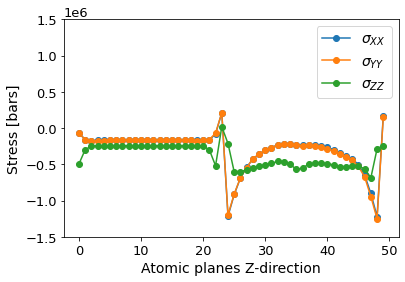

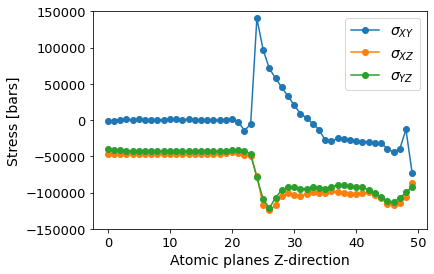

In [93]:
# Reading all the stress datas:
jid = 1020210

for i in ['XX', 'YY', 'ZZ', 'XY', 'XZ', 'YZ']:
    _, _, globals()[f'sigma{i}'] = read_file(f'./Simulations/jobfile_{jid}/Stress_{i}.dat', 2)
    
plt.rcParams.update({'xtick.labelsize': 13,
                     'ytick.labelsize':13,
                     'font.size': 14,
                     'font.serif':'Arial'
                    })
# Average and plot the data:
skip_col = 1                              # Number of columns to skip, here 0 = timestep
ave_time = 100                             # Each row is 1 ps, so how often we want to average
N_plane = np.arange(sigmaXX.shape[1] - 2) # no. of planes array, -2 for accouting pbc

print("No. of planes:", len(N_plane))
print("Time average :", ave_time, "ps")


# plotting the stress components XX, YY, ZZ:
plt.plot(N_plane, stress_pbc(sigmaXX, ave_time), '-o', label=r'$\sigma_{XX}$')
plt.plot(N_plane, stress_pbc(sigmaYY, ave_time), '-o', label=r'$\sigma_{YY}$')
plt.plot(N_plane, stress_pbc(sigmaZZ, ave_time), '-o', label=r'$\sigma_{ZZ}$')
plt.xlabel('Atomic planes Z-direction')
plt.ylabel('Stress [bars]')
plt.ylim(-1.5e6, 1.5e6)
plt.legend()
plt.savefig(f'./Simulations/jobfile_{jid}/Principal_stress_avg_t{ave_time}.png', dpi = 300, bbox_inches='tight', facecolor="w")
plt.show()

# plotting the stress components XY, XZ, YZ:
plt.plot(N_plane, stress_pbc(sigmaXY, ave_time), '-o', label=r'$\sigma_{XY}$')
plt.plot(N_plane, stress_pbc(sigmaXZ, ave_time), '-o', label=r'$\sigma_{XZ}$')
plt.plot(N_plane, stress_pbc(sigmaYZ, ave_time), '-o', label=r'$\sigma_{YZ}$')
plt.xlabel('Atomic planes Z-direction')
plt.ylabel('Stress [bars]')
plt.ylim(-1.5e5, 1.5e5)
plt.legend()
plt.savefig(f'./Simulations/jobfile_{jid}/Diagonal_stress_avg_t{ave_time}.png', dpi = 300, bbox_inches='tight', facecolor="w")
plt.show()

# Plotting the single stress using for loop:#
#-------------------------------------------#
# for i in ['XX', 'YY', 'ZZ', 'XY', 'XZ', 'YZ']:
#     # plotting the stress components:
#     N_plane = np.arange(globals()[f'sigma{i}'].shape[1] - 1) # no. of planes array
#     plt.plot(N_plane[1:-1], np.mean(globals()[f'sigma{i}'][-ave_time:, :], axis = 0)[skip_col+1:-1], '-or')
#     plt.xlabel('Atomic planes Z-direction')
#     plt.ylabel(f'sigma{i}')
#     plt.ylim(-2e4, 2e4)
#     plt.show()

### Au 100 structure | NPT | ro_0%increasePR_Nanopillar

No. of planes: 51
Time average : 100 ps


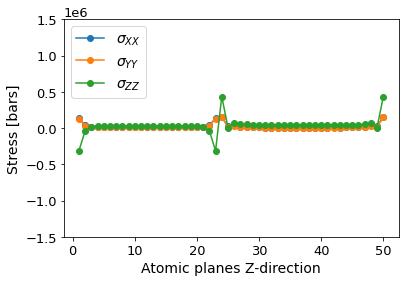

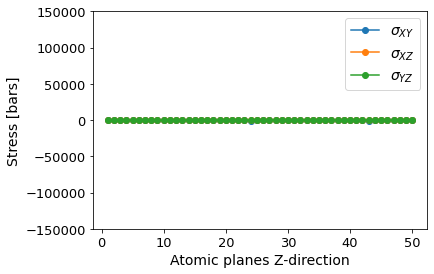

In [92]:
# Reading all the stress datas:
jid = 1024300

for i in ['XX', 'YY', 'ZZ', 'XY', 'XZ', 'YZ']:
    _, _, globals()[f'sigma{i}'] = read_file(f'./Simulations/jobfile_{jid}/Stress_{i}.dat', 2)
    
plt.rcParams.update({'xtick.labelsize': 13,
                     'ytick.labelsize':13,
                     'font.size': 14,
                     'font.serif':'Arial'
                    })
# Average and plot the data:
skip_col = 1                              # Number of columns to skip, here 0 = timestep
ave_time = 100                             # Each row is 1 ps, so how often we want to average
N_plane = np.arange(sigmaXX.shape[1] - 1) # no. of planes array

print("No. of planes:", len(N_plane))
print("Time average :", ave_time, "ps")

# plotting the stress components XX, YY, ZZ:
plt.plot(N_plane[1:], np.mean(sigmaXX[-ave_time:, :], axis = 0)[skip_col+1:], '-o', label=r'$\sigma_{XX}$')
plt.plot(N_plane[1:], np.mean(sigmaYY[-ave_time:, :], axis = 0)[skip_col+1:], '-o', label=r'$\sigma_{YY}$')
plt.plot(N_plane[1:], np.mean(sigmaZZ[-ave_time:, :], axis = 0)[skip_col+1:], '-o', label=r'$\sigma_{ZZ}$')
plt.xlabel('Atomic planes Z-direction')
plt.ylabel('Stress [bars]')
plt.ylim(-1.5e6, 1.5e6)
plt.legend()
plt.savefig(f'./Simulations/jobfile_{jid}/Principal_stress_avg_t{ave_time}.png', dpi = 300, bbox_inches='tight', facecolor="w")
plt.show()

# plotting the stress components XY, XZ, YZ:
plt.plot(N_plane[1:], np.mean(sigmaXY[-ave_time:, :], axis = 0)[skip_col+1:], '-o', label=r'$\sigma_{XY}$')
plt.plot(N_plane[1:], np.mean(sigmaXZ[-ave_time:, :], axis = 0)[skip_col+1:], '-o', label=r'$\sigma_{XZ}$')
plt.plot(N_plane[1:], np.mean(sigmaYZ[-ave_time:, :], axis = 0)[skip_col+1:], '-o', label=r'$\sigma_{YZ}$')
plt.xlabel('Atomic planes Z-direction')
plt.ylabel('Stress [bars]')
plt.ylim(-1.5e5, 1.5e5)
plt.legend()
plt.savefig(f'./Simulations/jobfile_{jid}/Diagonal_stress_avg_t{ave_time}.png', dpi = 300, bbox_inches='tight', facecolor="w")
plt.show()

# Plotting the single stress using for loop:#
#-------------------------------------------#
# for i in ['XX', 'YY', 'ZZ', 'XY', 'XZ', 'YZ']:
#     # plotting the stress components:
#     N_plane = np.arange(globals()[f'sigma{i}'].shape[1] - 1) # no. of planes array
#     plt.plot(N_plane[1:-1], np.mean(globals()[f'sigma{i}'][-ave_time:, :], axis = 0)[skip_col+1:-1], '-or')
#     plt.xlabel('Atomic planes Z-direction')
#     plt.ylabel(f'sigma{i}')
#     plt.ylim(-2e4, 2e4)
#     plt.show()